# Import Libs

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

# for train
from sklearn import linear_model
# for test
from sklearn.metrics import r2_score

# Open CSV File
The source of file is kaggle:
https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [21]:
df = pd.read_csv("CO2Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## A short describe about data

In [22]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Car makes that are involved in Data

In [23]:
make_counts = df["Make"].value_counts()
make_counts_table = pd.DataFrame({'Make': make_counts.index, 'Count': make_counts.values})
make_counts_table.head(len(make_counts_table))

,Make,Count
0,FORD,628
1,CHEVROLET,588
2,BMW,527
3,MERCEDES-BENZ,419
4,PORSCHE,376
5,TOYOTA,330
6,GMC,328
7,AUDI,286
8,NISSAN,259
9,JEEP,251


## Different types of cars

In [24]:
vc_counts = df["Vehicle Class"].value_counts()
vc_counts_table = pd.DataFrame({'Vehicle Class': vc_counts.index, 'Count': vc_counts.values})
vc_counts_table.head(len(make_counts_table))

,Vehicle Class,Count
0,SUV - SMALL,1217
1,MID-SIZE,1133
2,COMPACT,1022
3,SUV - STANDARD,735
4,FULL-SIZE,639
5,SUBCOMPACT,606
6,PICKUP TRUCK - STANDARD,538
7,TWO-SEATER,460
8,MINICOMPACT,326
9,STATION WAGON - SMALL,252


## Different types of engines

In [25]:
engine_size_counts = df["Engine Size(L)"].value_counts()
engine_size_counts_table = pd.DataFrame({'Engine Size(L)': engine_size_counts.index, 'Count': engine_size_counts.values})
engine_size_counts_table.head(len(make_counts_table))

,Engine Size(L),Count
0,2.0,1460
1,3.0,804
2,3.6,536
3,3.5,529
4,2.5,423
5,2.4,346
6,1.6,302
7,5.3,290
8,1.8,216
9,1.4,211


## Different types of number of cylanders

In [26]:
cylanders_counts = df["Cylinders"].value_counts()
cylanders_counts_table = pd.DataFrame({'Cylinders': cylanders_counts.index, 'Count': cylanders_counts.values})
cylanders_counts_table.head(len(make_counts_table))

,Cylinders,Count
0,4,3220
1,6,2446
2,8,1402
3,12,151
4,3,95
5,10,42
6,5,26
7,16,3


## Revise data titles to enhance ease of use.

In [27]:
new_column_names = {
    'Make': 'Make',
    'Model': 'Model',
    'Vehicle Class':'VehicleClass',
    'Engine Size(L)': 'EngineSize',
    'Cylinders': 'NumberOfCylinders',
    'Fuel Type':'FuelType',
    'Fuel Consumption City (L/100 km)':'FuelConsumptionCity',
    'Fuel Consumption Hwy (L/100 km)':'FuelConsumptionHwy',
    'Fuel Consumption Comb (L/100 km)': 'FuelConsumption',
    'CO2 Emissions(g/km)': 'CO2Emissions'
}

cdf = df.rename(columns=new_column_names)

In [28]:
cdf = cdf[['Make','Model','EngineSize','NumberOfCylinders','FuelConsumption','CO2Emissions']]
cdf.head(10)

,Make,Model,EngineSize,NumberOfCylinders,FuelConsumption,CO2Emissions
0,ACURA,ILX,2.0,4,8.5,196
1,ACURA,ILX,2.4,4,9.6,221
2,ACURA,ILX HYBRID,1.5,4,5.9,136
3,ACURA,MDX 4WD,3.5,6,11.1,255
4,ACURA,RDX AWD,3.5,6,10.6,244
5,ACURA,RLX,3.5,6,10.0,230
6,ACURA,TL,3.5,6,10.1,232
7,ACURA,TL AWD,3.7,6,11.1,255
8,ACURA,TL AWD,3.7,6,11.6,267
9,ACURA,TSX,2.4,4,9.2,212


## Show histograms of important columns

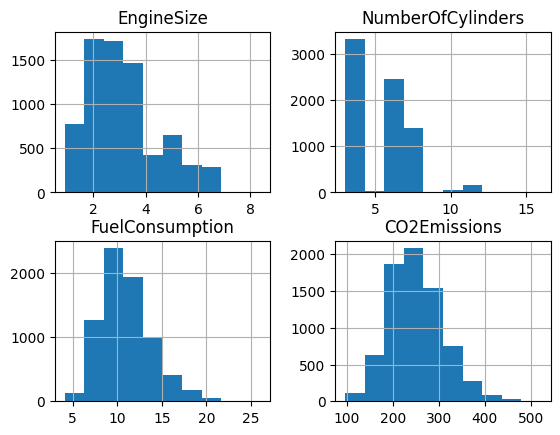

In [29]:
viz = cdf[['EngineSize','NumberOfCylinders','FuelConsumption','CO2Emissions']]
viz.hist()
plt.show()

## Sort car makes by C02Emissions

In [30]:
cdf_mark = cdf[['Make', 'CO2Emissions']]
avg_co2_by_make = cdf_mark.groupby('Make')['CO2Emissions'].mean().sort_values(ascending=False).reset_index()
avg_co2_by_make.head(len(avg_co2_by_make))

,Make,CO2Emissions
0,BUGATTI,522.000000
1,LAMBORGHINI,400.780488
2,SRT,389.000000
3,ROLLS-ROYCE,388.480000
4,BENTLEY,362.934783
5,ASTON MARTIN,339.617021
6,MASERATI,318.147541
7,GMC,299.917683
8,RAM,292.402062
9,LAND ROVER,287.647059


## Fuel Consumption vs. Emission plot

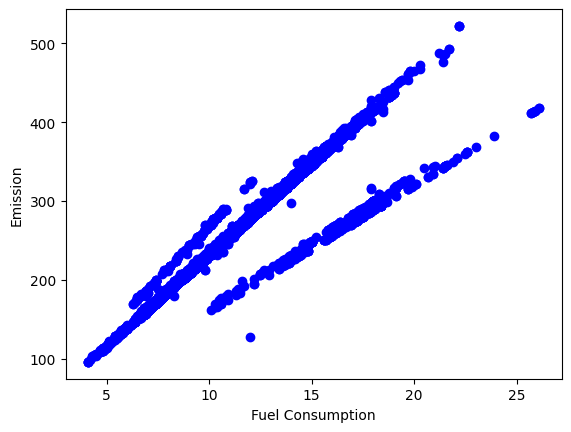

In [31]:
plt.scatter(cdf.FuelConsumption, cdf.CO2Emissions,  color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

## Engine size vs. Emission plot

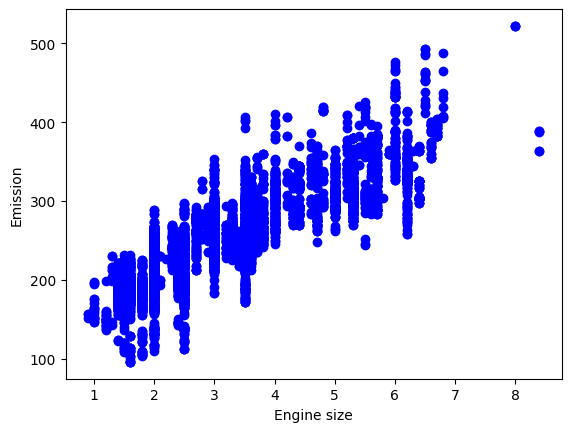

In [32]:
plt.scatter(cdf.EngineSize, cdf.CO2Emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Number of Cylanders vs. Emission plot

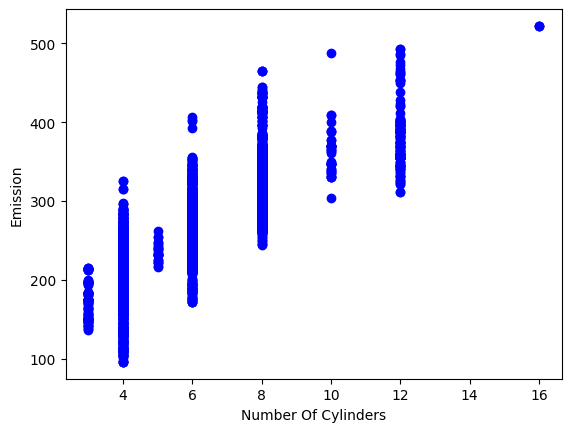

In [33]:
plt.scatter(cdf.NumberOfCylinders, cdf.CO2Emissions,  color='blue')
plt.xlabel("Number Of Cylinders")
plt.ylabel("Emission")
plt.show()

## Train / Test split

In [34]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Train Data

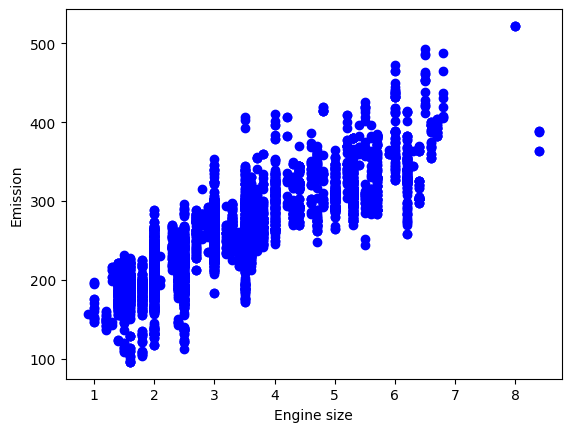

In [35]:
plt.scatter(train.EngineSize, train.CO2Emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Find θ zero and θ one of SLR formula

### Simple linear Regression =  y = A + BX
#### A = Theta zero : Intercept
#### B = Theta one : Line slope

In [36]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['EngineSize']])
train_y = np.asanyarray(train[['CO2Emissions']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients(Line slope): ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients(Line slope):  [[36.87272461]]
Intercept:  [134.42267925]


## Draw the line

Text(0, 0.5, 'Emission')

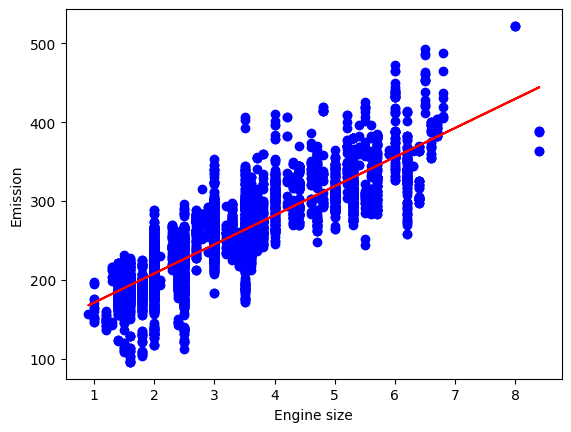

In [37]:
plt.scatter(train.EngineSize, train.CO2Emissions,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation and test data by R^2 formula

### R^2 = 1 - RSE (Relative Squared Error)

In [38]:
test_x = np.asanyarray(test[['EngineSize']])
test_y = np.asanyarray(test[['CO2Emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.61
Residual sum of squares (MSE): 961.25
R2-score: 0.71
